# GROUP 5 CAPSTONE PROJECT
### MEMBERS
- BATAMULIZA FAITH
- MUSIIMENTA CYNTHIA
- KAGYEZI DAVIS

**Import Libraries**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import streamlit as st

import pickle

**Import Data**

In [2]:
# Load dataset
df = pd.read_csv('act_bliz.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,04/01/2010,11.23,11.45,11.15,11.30,9310055,USD
1,05/01/2010,11.24,11.36,11.21,11.32,11370203,USD
2,06/01/2010,11.26,11.38,11.21,11.26,6541811,USD
3,07/01/2010,11.10,11.19,10.93,10.99,15392067,USD
4,08/01/2010,10.97,11.05,10.88,10.90,11003838,USD


## Data cleaning and EDA

In [3]:
df.describe()

,Open,High,Low,Close,Volume
count,3191.000000,3191.000000,3191.000000,3191.000000,3.191000e+03
mean,41.182582,41.651981,40.659427,41.168944,8.338742e+06
std,27.159710,27.437066,26.823029,27.129389,5.986719e+06
min,9.970000,10.160000,9.930000,10.010000,1.369310e+06
25%,14.220000,14.400000,14.030000,14.210000,5.181313e+06
50%,37.230000,37.680000,36.690000,37.220000,6.958290e+06
75%,65.205000,65.850000,64.060000,65.065000,9.682788e+06
max,103.820000,104.490000,102.580000,103.810000,1.330824e+08


In [4]:
# Quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3191 non-null   object 
 1   Open      3191 non-null   float64
 2   High      3191 non-null   float64
 3   Low       3191 non-null   float64
 4   Close     3191 non-null   float64
 5   Volume    3191 non-null   int64  
 6   Currency  3191 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 174.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
# Convert the date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True, errors='coerce') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3191 non-null   datetime64[ns]
 1   Open      3191 non-null   float64       
 2   High      3191 non-null   float64       
 3   Low       3191 non-null   float64       
 4   Close     3191 non-null   float64       
 5   Volume    3191 non-null   int64         
 6   Currency  3191 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 174.6+ KB


## Visualizations

Univariate visualization

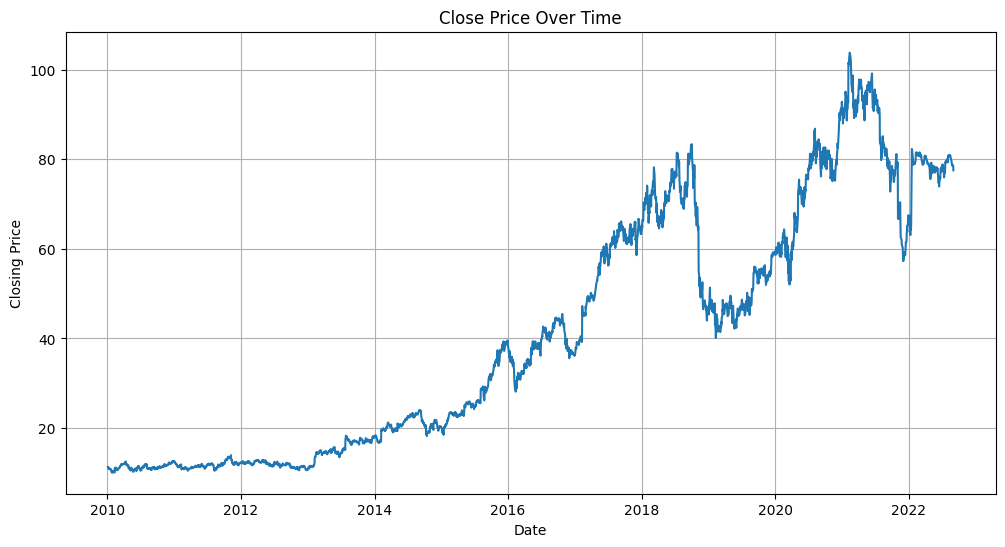

In [7]:
plt.figure(figsize = (12,6));
plt.plot(df['Date'], df['Close'])
plt.grid(True);
plt.title('Close Price Over Time');
plt.ylabel('Closing Price');
plt.xlabel('Date');
plt.savefig('pricevstime.png', dpi = 300);
plt.show();

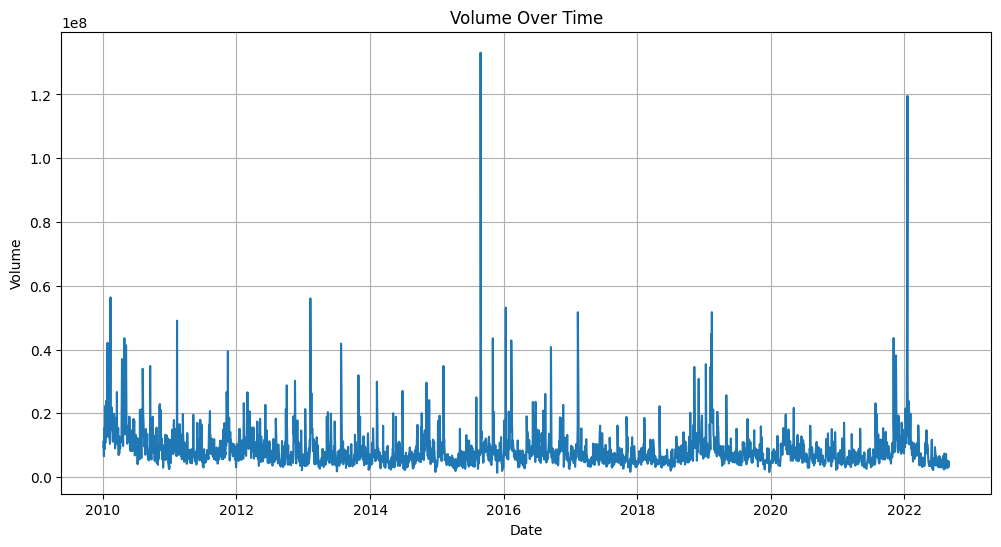

In [8]:
plt.figure(figsize = (12,6));
plt.plot(df['Date'], df['Volume'])
plt.grid(True);
plt.title('Volume Over Time');
plt.ylabel('Volume');
plt.xlabel('Date');
plt.savefig('volumevstime.png', dpi = 300);
plt.show();

<Figure size 800x500 with 0 Axes>

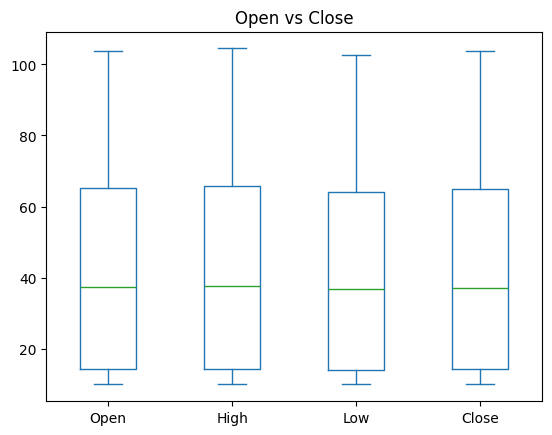

In [9]:
plt.figure(figsize=(8,5))
df[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.title('Open vs Close')
plt.show()

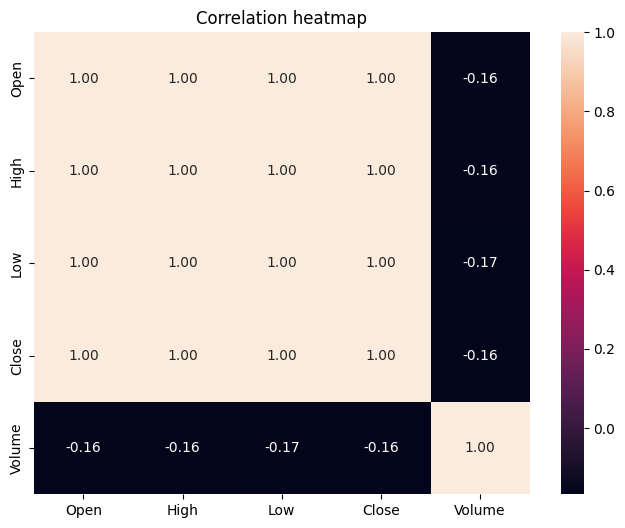

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f')
plt.title('Correlation heatmap')
plt.savefig('heatmap.png', dpi = 300);
plt.show()

## Feature engineering

In [11]:
df.drop('Currency', axis = 1, inplace = True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,11.23,11.45,11.15,11.30,9310055
1,2010-01-05,11.24,11.36,11.21,11.32,11370203
2,2010-01-06,11.26,11.38,11.21,11.26,6541811
3,2010-01-07,11.10,11.19,10.93,10.99,15392067
4,2010-01-08,10.97,11.05,10.88,10.90,11003838


## Machine Learning Model ##

In [12]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 1)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Instantiate a default decision tree
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
#model training
model.fit(X_train_scaled,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Testing the model -Obtain predictions
y_pred = model.predict(X_test_scaled)

In [18]:
# Evaluating
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

Model Evaluation Metrics:
RMSE: 0.4272
MAE:  0.2684
R²:   0.9998


In [19]:
# residual plot

# plt.figure(figsize=(8,5))
# plt.scatter(y_test, y_pred, s=8)
# plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--')
# plt.xlabel('True Close_next'); 
# plt.ylabel('Predicted Close_next')
# plt.title('RF predicted vs true')
# plt.show()

## Deep Learning Model ##

In [20]:
# Split data into training and testing - testing is month of January 2020
# We will also only use the closing column
df.set_index('Date', inplace=True)

train = df.loc['2010-01-04':'2020-12-31', ['Close']]
test = df.loc['2021-01-01':'2022-09-02', ['Close']]

In [21]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,11.23,11.45,11.15,11.30,9310055
2010-01-05,11.24,11.36,11.21,11.32,11370203
2010-01-06,11.26,11.38,11.21,11.26,6541811
2010-01-07,11.10,11.19,10.93,10.99,15392067
2010-01-08,10.97,11.05,10.88,10.90,11003838
...,...,...,...,...,...
2022-08-29,78.55,79.08,78.50,78.75,3657033
2022-08-30,78.83,78.94,78.47,78.62,3075012
2022-08-31,79.06,79.07,78.49,78.49,4108374


In [22]:
print(train.shape)
print(test.shape)

(2770, 1)
(421, 1)


In [23]:
# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [24]:
# Reshape data into sequences using TimeseriesGenerator
train_features = TimeseriesGenerator(train, train, length = 5)
train_features

Step 1: Define our network structure

In [25]:
# Save the input shape
input_shape = train_features[0][0][0].shape
input_shape

(5, 1)

In [26]:
# Sequential model
model = Sequential()

We can now add our hidden layers! We will use three LSTM layers in this network.

Since we are doing regression here, the linear activation function will be used in our output layer.

In [27]:
# LSTM Input layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = input_shape))

# Hidden layer 1
model.add(LSTM(units = 50, return_sequences = True))

# Hidden layer 2
model.add(LSTM(units = 50, return_sequences = False))

# Output layer
model.add(Dense(units = 1, activation = 'linear'))

Step 2: Compile our model

Since this is a regression problem, we will use mean squared error as our loss function.

In [28]:
# Step 2: Compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

Step 3: Fit our model

In [29]:
# Step 3: Fit our model
history = model.fit(train_features, epochs=100)

Epoch 1/100
22/22 [==============================] - 9s 15ms/step - loss: 0.0875
Epoch 2/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 3/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 4/100
22/22 [==============================] - 0s 14ms/step - loss: 9.4857e-04
Epoch 5/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 6/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 8/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 9/100
22/22 [==============================] - 0s 13ms/step - loss: 5.4434e-04
Epoch 10/100
22/22 [==============================] - 0s 13ms/step - loss: 4.1373e-04
Epoch 11/100
22/22 [==============================] - 0s 13ms/step - loss: 3.8907e-04
Epoch 12/100
22/22 [==============================] - 0s 13ms/step - loss: 3.7491e-04
Epoch

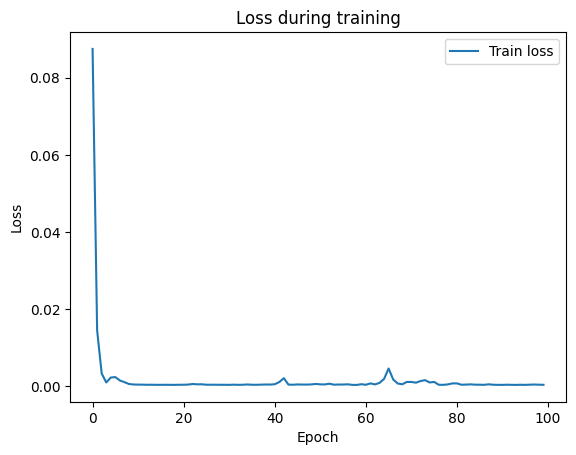

In [30]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('Epoch'); 
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend();

**Predict stock prices from the year 2020**

Let's now predict closing prices from the year 2020 using the previous 5 days' closing prices. In order to do this, we need to do the same preprocessing on our testing data that we did with our training data.

In [31]:
test_features = TimeseriesGenerator(test, test, length = 5)
test_features

We can save our predictions on our testing set:

In [32]:
pred = model.predict(test_features)

4/4 [==============================] - 2s 6ms/step


And now, let's visualize our model predictions compared to the actual closing prices of Apple stocks for the month of January 2020:

In [33]:
true = test[5:] # this now has the same length as predictions
true.shape

(416, 1)

In [34]:
# Evaluating
rmse = np.sqrt(mean_squared_error(true, pred))
mae = mean_absolute_error(true, pred)
r2 = r2_score(true, pred)

print("Model Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}") 

Model Evaluation Metrics:
RMSE: 0.0359
MAE:  0.0239
R²:   0.9142


In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test), label='Actual Price')
# Note: there are less prices for the predicted price than the actual price,
# because we need to use 5 days of prices to create our first prediction
plt.plot(range(5, len(test)), scaler.inverse_transform(pred), label='Predicted Price')
plt.title('Activision Closing Stock Price Prediction')
plt.xlabel('Day (from January 2020)')
plt.ylabel('Closing Price')
plt.legend();

SAVING THE MODEL

In [36]:
# Save the model
model.save("lstm_stock_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [37]:
# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

DEPLOY THE MODEL

In [ ]:
!streamlit run streamlit_app.py